# Case Study: Loan Eligibility

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pymysql
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import getpass  # to get the password without showing the input
password = getpass.getpass()

connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)

import warnings
warnings.filterwarnings('ignore')

········


Welcome to the loan eligibility prediction problem! The objective is to determine whether a customer is eligible for a loan or not. Despite having a relatively small database with 614 values and 13 columns, I will leverage the "Loan_Data.csv" database, which has been made available for use.
Overall, the notebook's goal is to develop an accurate loan eligibility prediction model by leveraging data analysis, preprocessing techniques, class balancing, and machine learning classification algorithms. The objective is to create a fair and reliable loan approval process that benefits both the institution and the customers.

First Part: To begin, let's analyze the data and process it for further exploration. The dataset contains various attributes that can help us make predictions. We will perform feature engineering, handle missing values, and perform any necessary transformations to ensure the data is suitable for our classification task.

# Data Preparation & Cleaning

In [2]:
# Import the Dataset 

In [3]:
df = pd.read_csv('Loan_Data.csv', sep = ',')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Show us the whole table

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
# Preparation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here are the key points of the File:
- The DataFrame consists of 614 rows (entries) and 13 columns.
- The columns are labeled as follows:
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status
- The columns have different numbers of non-null values, indicating the presence of missing data:
'Gender' has 601 non-null values.
'Married' has 611 non-null values.
'Dependents' has 599 non-null values.
'Self_Employed' has 582 non-null values.
'LoanAmount' has 592 non-null values.
'Loan_Amount_Term' has 600 non-null values.
'Credit_History' has 564 non-null values.
Other columns have 614 non-null values, indicating they are complete.
- The data types of the columns are:
Four columns have float64 data type.
One column has int64 data type.
Eight columns have object data type.

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.shape

(614, 13)

In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [13]:
# I used the following function to see if we have any duplicates in the files. 

In [14]:
df = df.drop_duplicates()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
# Now we want to standardizie the colomn names

In [16]:
df.columns = df.columns.str.replace('ApplicantIncome', 'applicant_income').str.replace('CoapplicantIncome', 'coapplicant_income').str.replace('LoanAmount', 'loan_amount').str.replace(' ', '_').str.lower()


In [17]:
df

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Here I have first written all words in lower case. As soon as the column contains two words, I separated the words with a _. In addition, three words still had to be written apart (applicant_income	coapplicant_income	loan_amount).

In [18]:
# here we can see % of the missing values. So we can check the data quality

In [19]:
df.isna().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [20]:
(df.isnull().sum()/len(df)) * 100

loan_id               0.000000
gender                2.117264
married               0.488599
dependents            2.442997
education             0.000000
self_employed         5.211726
applicant_income      0.000000
coapplicant_income    0.000000
loan_amount           3.583062
loan_amount_term      2.280130
credit_history        8.143322
property_area         0.000000
loan_status           0.000000
dtype: float64

In [21]:
loan_status_counts = df['loan_status'].value_counts()

print(loan_status_counts)

Y    422
N    192
Name: loan_status, dtype: int64


In [22]:
empty_y_count = df[df['loan_status'] == 'Y'].isnull().sum()
empty_n_count = df[df['loan_status'] == 'N'].isnull().sum()

In [23]:
print(empty_y_count)

loan_id                0
gender                 8
married                3
dependents             9
education              0
self_employed         23
applicant_income       0
coapplicant_income     0
loan_amount           11
loan_amount_term       8
credit_history        37
property_area          0
loan_status            0
dtype: int64


In [24]:
print(empty_n_count)

loan_id                0
gender                 5
married                0
dependents             6
education              0
self_employed          9
applicant_income       0
coapplicant_income     0
loan_amount           11
loan_amount_term       6
credit_history        13
property_area          0
loan_status            0
dtype: int64


In [25]:
# Replace the Nan in the column gender with "unkown", because it has no influence on the credit decision

In [26]:
df['gender'].fillna('unknown', inplace=True)

In [27]:
df.isna().sum()

loan_id                0
gender                 0
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [28]:
# Create a list of columns in which NaN values are to be replaced with the median

In [29]:
columns_to_impute = ["applicant_income", "coapplicant_income", "loan_amount", "loan_amount_term", "credit_history"]

In [30]:
# Iterate over the columns and replace the NaN values with the median

In [31]:
for column in columns_to_impute:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [32]:
# checking the results

In [33]:
print(df[columns_to_impute].isnull().sum())

applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
dtype: int64


In [34]:
df.isna().sum()

loan_id                0
gender                 0
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount            0
loan_amount_term       0
credit_history         0
property_area          0
loan_status            0
dtype: int64

In [35]:
# Delete the empty rows

In [36]:
columns_to_dropna = ["married", "dependents", "self_employed"]

In [37]:
df.dropna(subset=columns_to_dropna, inplace=True)

In [38]:
print(df[columns_to_dropna].isnull().sum())

married          0
dependents       0
self_employed    0
dtype: int64


In [39]:
df.shape

(567, 13)

I have decided to delete the remaining empty lines, as the respective answers here can be decisive for a credit decision. Therefore, I did not choose to replace the "gender" column with the word "unknown". In total, 50 rows were deleted. 35 rows from the category "Y" and 15 rows from the category "N".

# EDA - Exploratory Data Analysis

In [40]:
# Let's separate the numerical from the categorical columns:
numerical_columns = df.select_dtypes("number")
categorical_columns = df.select_dtypes("object")

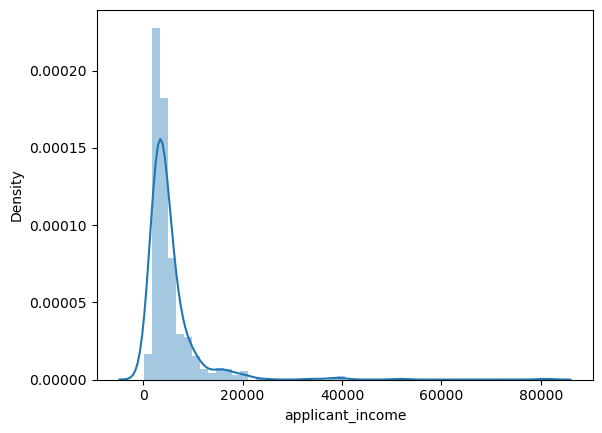

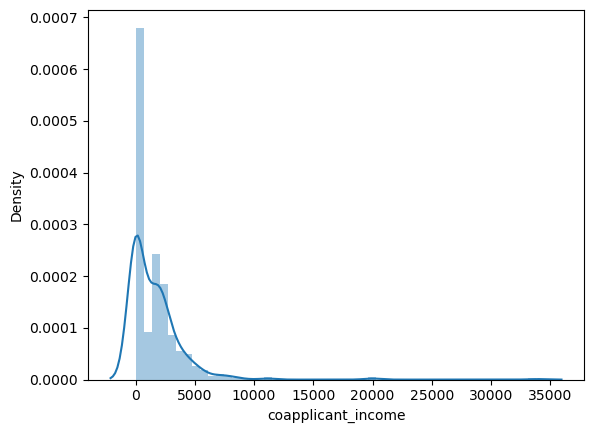

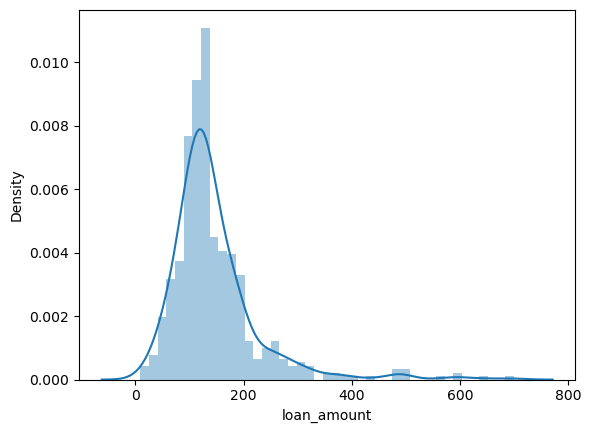

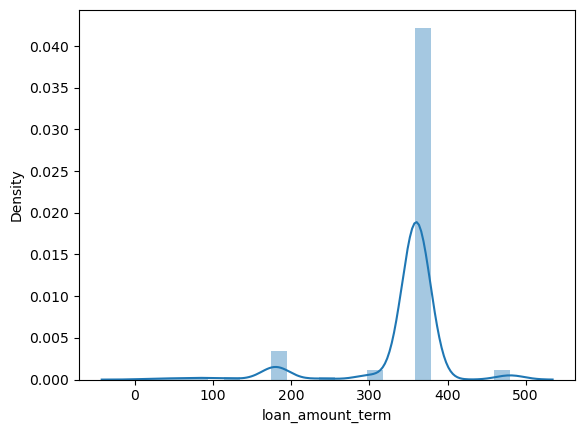

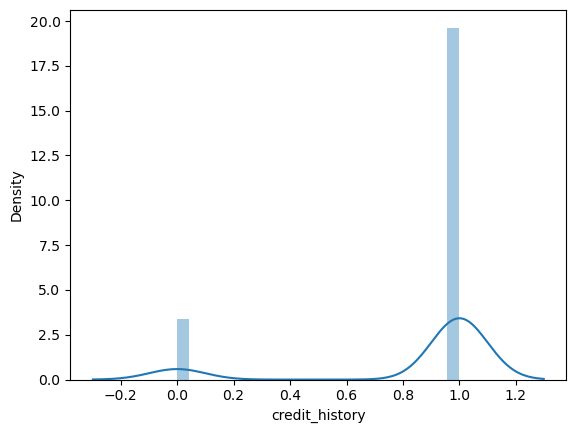

In [41]:
# Let's check the distribution on the numerical columns:
for col in numerical_columns.columns:
  sns.distplot(numerical_columns[col])
  plt.show()

In [42]:
df

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [43]:
# Calculate average income for each Loan_Status category

In [44]:
avg_income_yes = df[df['loan_status'] == 'Y']['applicant_income'].mean()
avg_income_no = df[df['loan_status'] == 'N']['applicant_income'].mean()

In [45]:
# Create a bar plot

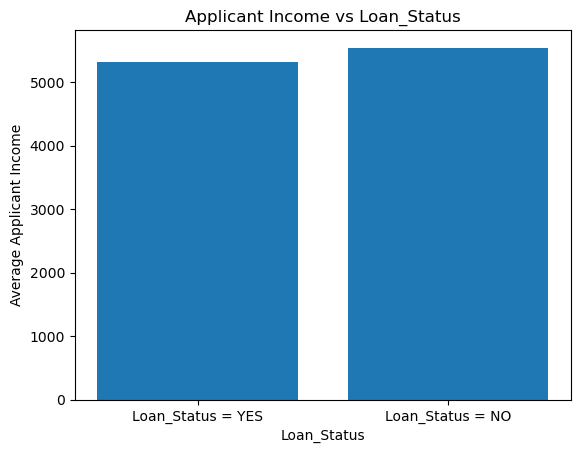

In [46]:
plt.bar(['Loan_Status = YES', 'Loan_Status = NO'], [avg_income_yes, avg_income_no])
plt.xlabel('Loan_Status')
plt.ylabel('Average Applicant Income')
plt.title('Applicant Income vs Loan_Status')
plt.show()

In [47]:
sec_avg_income_yes = df[df['loan_status'] == 'Y']['coapplicant_income'].mean()
sec_avg_income_no = df[df['loan_status'] == 'N']['coapplicant_income'].mean()

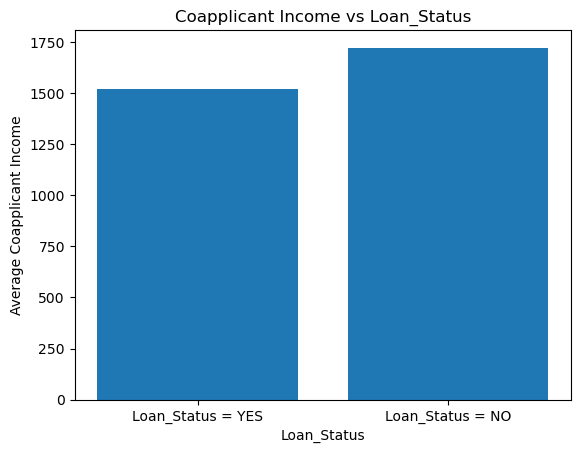

In [48]:
plt.bar(['Loan_Status = YES', 'Loan_Status = NO'], [sec_avg_income_yes, sec_avg_income_no])
plt.xlabel('Loan_Status')
plt.ylabel('Average Coapplicant Income')
plt.title('Coapplicant Income vs Loan_Status')
plt.show()

In [49]:
# Creation of different contingency tables

In [50]:
education_loan_contingency = pd.crosstab(df['education'], df['loan_status'])
property_loan_contingency = pd.crosstab(df['property_area'], df['loan_status'])
married_loan_contingency = pd.crosstab(df['married'], df['loan_status'])

print("Education vs Loan_Status:")
print(education_loan_contingency)
print("\nProperty_Area vs Loan_Status:")
print(property_loan_contingency)
print("\nMarried vs Loan_Status:")
print(married_loan_contingency)

Education vs Loan_Status:
loan_status     N    Y
education             
Graduate      129  314
Not Graduate   48   76

Property_Area vs Loan_Status:
loan_status     N    Y
property_area         
Rural          65  102
Semiurban      50  167
Urban          62  121

Married vs Loan_Status:
loan_status    N    Y
married              
No            73  122
Yes          104  268


In [51]:
# These bar plots will visually represent the frequencies of different categories for each Loan_Status category, 
# allowing to compare the distributions and observe any potential relationships between the categorical 
# variables and Loan_Status.

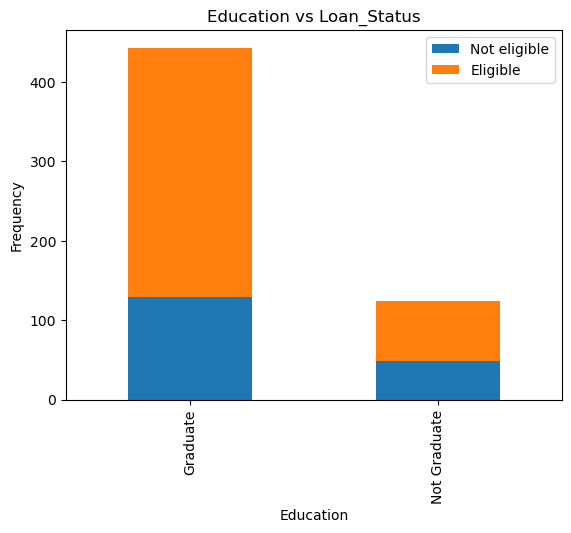

In [52]:
education_loan_contingency.plot(kind='bar', stacked=True)
plt.title("Education vs Loan_Status")
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.legend(["Not eligible", "Eligible"])
plt.show()

Education vs Loan_Status:
- This table compares the education level ("Graduate" or "Not Graduate") with the loan status ("Y" for eligible or "N" for not eligible).
- We can observe that among the individuals with a "Graduate" education, a higher number (314) were eligible for a loan compared to those who were not eligible (129).
- On the other hand, among individuals with a "Not Graduate" education, the numbers are lower, with 76 being eligible and 48 being not eligible.
- This suggests that having a graduate education may positively influence the chances of being eligible for a loan.

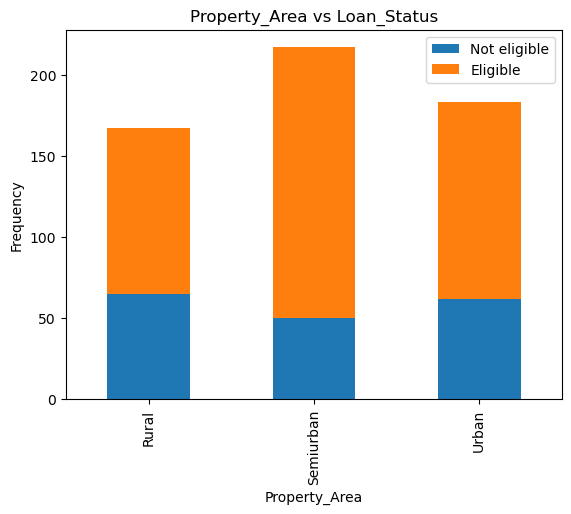

In [53]:
property_loan_contingency.plot(kind='bar', stacked=True)
plt.title("Property_Area vs Loan_Status")
plt.xlabel("Property_Area")
plt.ylabel("Frequency")
plt.legend(["Not eligible", "Eligible"])
plt.show()

Property_Area vs Loan_Status:
- This table examines the property area ("Rural", "Semiurban", or "Urban") in relation to the loan status.
- In the "Rural" area, the number of individuals eligible for a loan (102) is higher than those who are not eligible (65).
- In the "Semiurban" area, the trend is even more pronounced, with a significantly higher number of individuals (167) being eligible compared to those who are not eligible (50).
- In the "Urban" area, the numbers are more balanced, with 121 individuals eligible and 62 not eligible.
- This suggests that individuals residing in semiurban areas have a higher chance of being eligible for a loan compared to rural or urban areas.

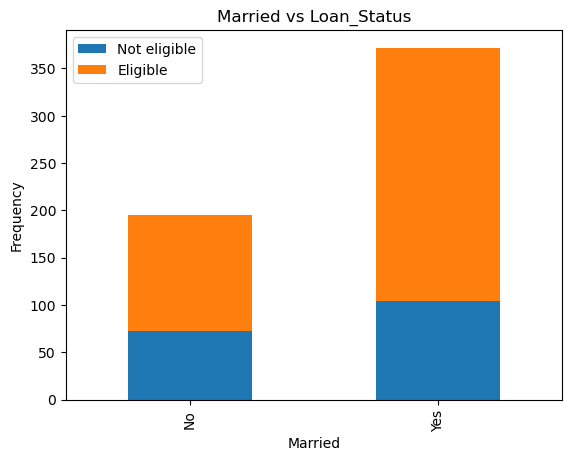

In [54]:
married_loan_contingency.plot(kind='bar', stacked=True)
plt.title("Married vs Loan_Status")
plt.xlabel("Married")
plt.ylabel("Frequency")
plt.legend(["Not eligible", "Eligible"])
plt.show()

Married vs Loan_Status:
- This table examines the marital status ("Yes" or "No") and its relationship with the loan status.
- Among individuals who are married ("Yes"), a higher number (268) are eligible for a loan compared to those who are not eligible (104).
- Among individuals who are not married ("No"), the numbers are relatively balanced, with 122 individuals eligible and 73 not eligible.
- This indicates that being married may increase the likelihood of being eligible for a loan.

# Correlations

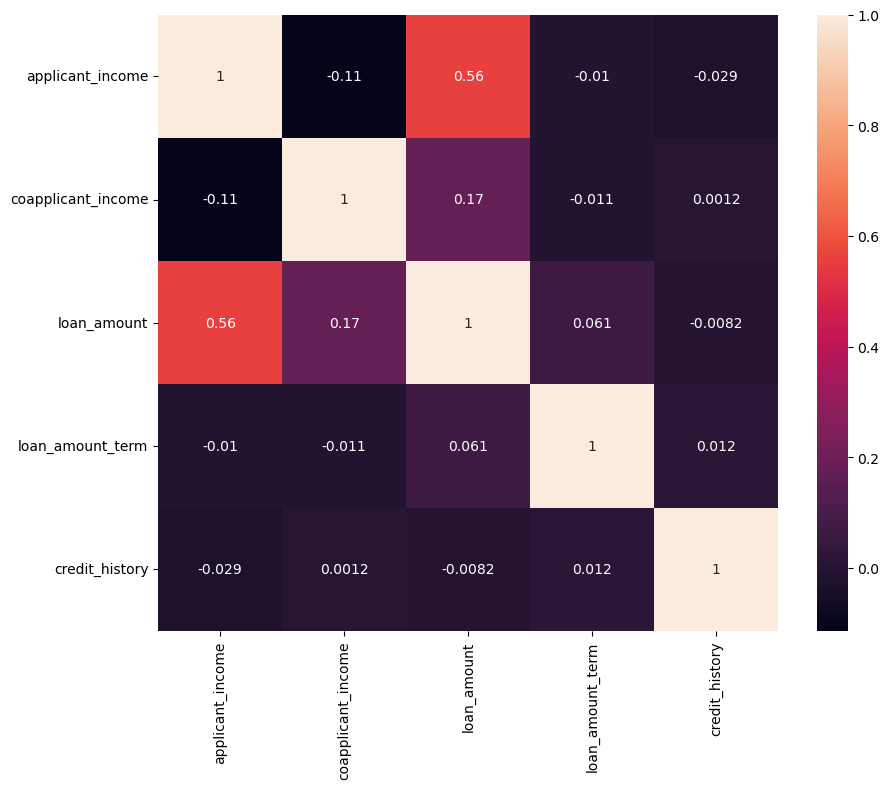

In [55]:
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

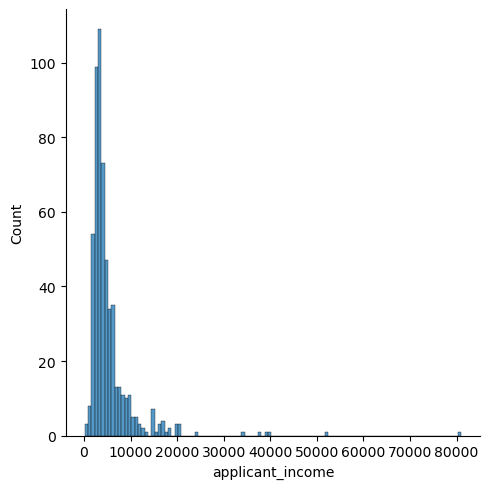

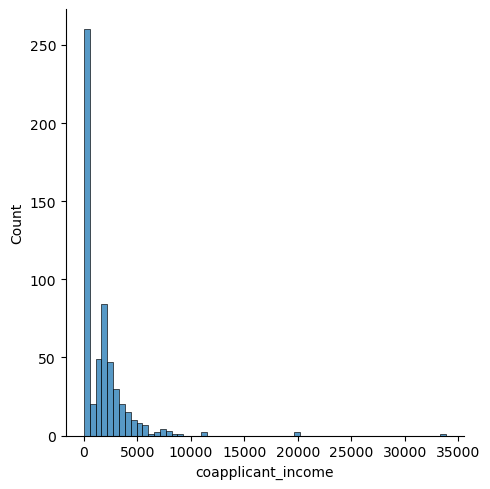

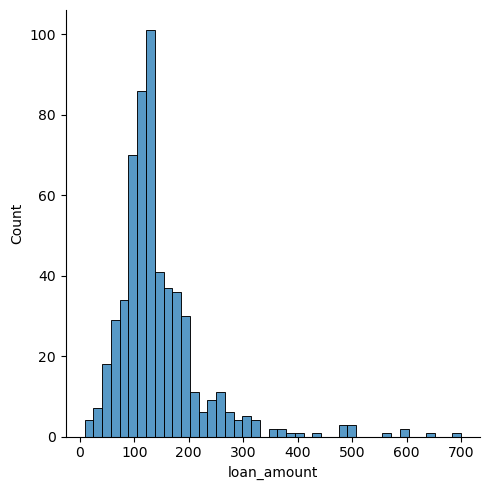

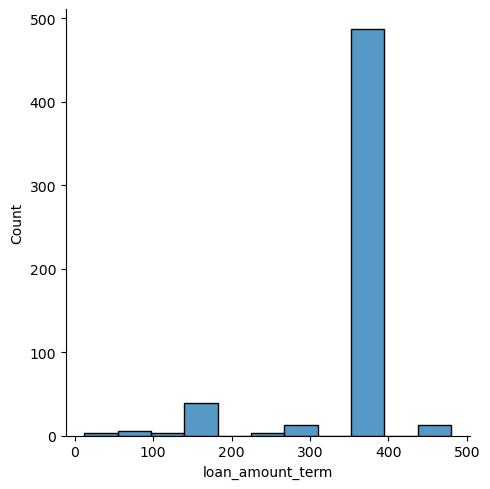

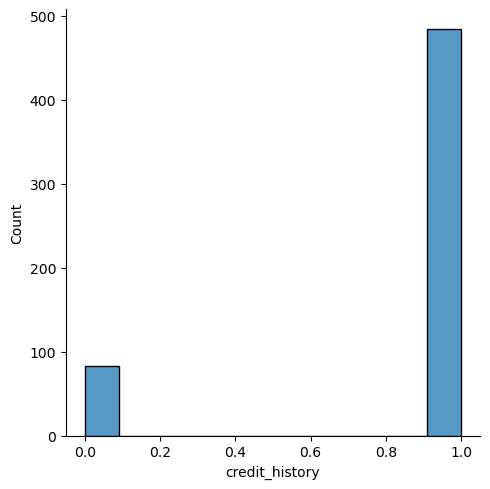

In [56]:
for col in df.select_dtypes(np.number):
    sns.displot(df[col])
    plt.show()

# Modeling (logistic regression)

In [ ]:
# Here we will remove the LoanID variable that will not be used, because is has no influence on our model

In [57]:
df = df.drop('loan_id', axis = 1)
df

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Splitting the data
# For us to be able to train an algorithm we will need to split the features from the target, also referred to as X-y split.
# To make sure our model will not *overfit* and will present similar success results when we use it in real life, 
# we will also be splitting the dataset into training and testing data.

In [75]:
df['dependents'] = df['dependents'].replace('3+', 10)
df['dependents'] = pd.to_numeric(df['dependents'])

In [76]:
X = df.drop(columns="loan_status")
y = df["loan_status"]

In [77]:
X

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,10,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [78]:
categorical_cols = ['gender', 'married', 'education', 'self_employed', 'property_area']
X = pd.get_dummies(X, columns=categorical_cols)

In [79]:
# Display the encoded dataset
print(X.head())

   dependents  applicant_income  coapplicant_income  loan_amount  \
0           0              5849                 0.0        128.0   
1           1              4583              1508.0        128.0   
2           0              3000                 0.0         66.0   
3           0              2583              2358.0        120.0   
4           0              6000                 0.0        141.0   

   loan_amount_term  credit_history  gender_Female  gender_Male  \
0             360.0             1.0              0            1   
1             360.0             1.0              0            1   
2             360.0             1.0              0            1   
3             360.0             1.0              0            1   
4             360.0             1.0              0            1   

   gender_unknown  married_No  married_Yes  education_Graduate  \
0               0           1            0                   1   
1               0           0            1              

Each categorical column has been replaced with binary columns, where a value of 1 indicates the presence of a particular category and 0 indicates its absence.
By performing one-hot encoding, we have transformed the categorical variables into a numerical format that can be used by machine learning algorithms. This encoding enables the algorithms to effectively learn from the data and make predictions.
The encoded feature variables will be used as inputs to train a logistic regression model for predicting the Loan_Status, which is the target variable.

In [80]:
pd.get_dummies(df).corr()["loan_status_Y"].sort_values()

loan_status_N             -1.000000
property_area_Rural       -0.107443
married_No                -0.097169
education_Not Graduate    -0.085549
property_area_Urban       -0.039671
coapplicant_income        -0.037306
loan_amount               -0.031362
gender_Female             -0.024579
gender_unknown            -0.023949
applicant_income          -0.018224
loan_amount_term          -0.013233
dependents                -0.012603
self_employed_Yes         -0.000289
self_employed_No           0.000289
gender_Male                0.032409
education_Graduate         0.085549
married_Yes                0.097169
property_area_Semiurban    0.138922
credit_history             0.539328
loan_status_Y              1.000000
Name: loan_status_Y, dtype: float64

- loan_status_N has a correlation value of -1. This indicates a strong negative correlation between loan_status_N and loan_status_Y. This makes sense since they are two complementary categories of the target variable.
- property_area_Rural, married_No, and education_Not Graduate have negative correlation values. This suggests that these categories tend to be associated with a lower likelihood of loan approval (loan_status_Y).
- On the other hand, property_area_Semiurban and credit_history have positive correlation values. This indicates that these categories are associated with a higher likelihood of loan approval.
- Other features have relatively weaker correlations with loan_status_Y.

In [81]:
pd.get_dummies(df).corr()["loan_status_N"].sort_values()

loan_status_Y             -1.000000
credit_history            -0.539328
property_area_Semiurban   -0.138922
married_Yes               -0.097169
education_Graduate        -0.085549
gender_Male               -0.032409
self_employed_No          -0.000289
self_employed_Yes          0.000289
dependents                 0.012603
loan_amount_term           0.013233
applicant_income           0.018224
gender_unknown             0.023949
gender_Female              0.024579
loan_amount                0.031362
coapplicant_income         0.037306
property_area_Urban        0.039671
education_Not Graduate     0.085549
married_No                 0.097169
property_area_Rural        0.107443
loan_status_N              1.000000
Name: loan_status_N, dtype: float64

- loan_status_Y has a correlation value of -1, indicating a strong negative correlation with loan_status_N, as they are complementary categories.
- credit_history and property_area_Semiurban have negative correlation values. This suggests that these categories are associated with a lower likelihood of loan rejection (loan_status_N).
- property_area_Rural and married_No also have negative correlation values, indicating that they are associated with a lower likelihood of loan rejection.
- Similarly, other features have relatively weaker correlations with loan_status_N.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
classification = LogisticRegression(random_state=42) 

classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [85]:
classification.score(X_test, y_test)

0.7807017543859649

The result 0.7807017543859649 is the accuracy score of the logistic regression model on the test dataset.

The accuracy score represents the proportion of correctly predicted loan statuses (either 'Y' or 'N') in the test dataset. In this case, the logistic regression model correctly predicted the loan status for approximately 78.07% of the instances in the test dataset.

In [ ]:
# Confusion Matrix & Checking if we have imbalanced dataset

In [87]:
y_train.value_counts()

Y    313
N    140
Name: loan_status, dtype: int64

In [94]:
predictions = classification.predict(X_test)
predictions

array(['N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [95]:
confusion_matrix(y_test, predictions) 

array([[15, 22],
       [ 3, 74]])

<Axes: >

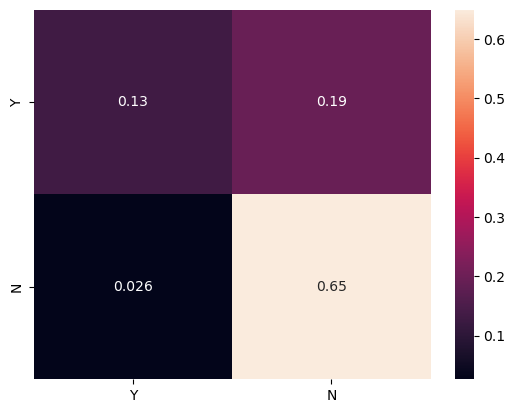

In [96]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["Y", "N"], yticklabels=["Y", "N"])

The result of the confusion matrix provides information about the performance of the classification model. The confusion matrix is a 2x2 matrix that represents the count of correctly and incorrectly classified instances for each class.

- True Negative (TN): 15 - These are the cases that were actually classified as "N" (loan rejection) and were correctly predicted by the model.
- False Positive (FP): 22 - These are the cases that were actually classified as "N" (loan rejection), but were falsely predicted as "Y" (loan approval) by the model.
- False Negative (FN): 3 - These are the cases that were actually classified as "Y" (loan approval), but were falsely predicted as "N" (loan rejection) by the model.
- True Positive (TP): 74 - These are the cases that were actually classified as "Y" (loan approval) and were correctly predicted by the model.

In [ ]:
# Extra: Balancing

In [97]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=42)

X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train) 

y_train_balanced.value_counts()

N    313
Y    313
Name: loan_status, dtype: int64

In [98]:
classification = LogisticRegression(random_state=42) 
classification.fit(X_train_balanced, y_train_balanced)
classification.score(X_test, y_test)

0.7631578947368421

<Axes: >

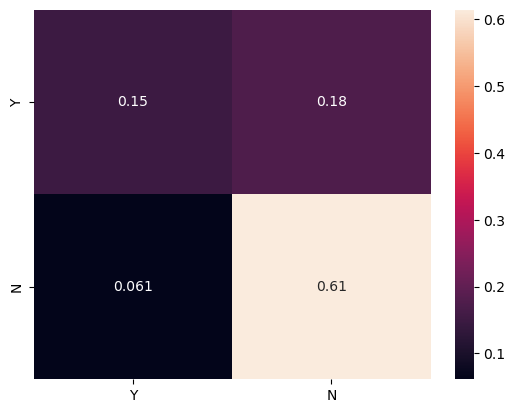

In [99]:
predictions = classification.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["Y", "N"], yticklabels=["Y", "N"])